<a href="https://colab.research.google.com/github/LaraSofiaLopes/Numerical-Analysis/blob/master/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 5**

### Lara Lopes

### **1)**

In [2]:
# Defining Function
import numpy as np

def f(x):
   return np.sin(4*x)*x

# Defining derivative of function
def g(x):
   return np.sin(4*x)+4*np.cos(4*x)*x

# Implementing Newton Method
def newton(x0,e,N):
   print('\n\n*** NEWTON METHOD IMPLEMENTATION ***')
   step = 1
   flag = 1
   x1 = 99
   condition = True

   while condition:
      if g(x0) == 0.0:
         print('Divide by zero error!')
         break
      x1 = x0 - f(x0)/g(x0)
      print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, f(x1)))
      x0 = x1
      step = step + 1
      if step > N:
         flag = 0
         break
      condition = abs(f(x1)) > e
      if flag==1:
         print('\nRequired root is: %0.8f' % x1)
      else:
         print('\nNot Convergent.')
   return x1, step  
    
# Input Section
print("Input scanning range:")
x0 = input('Enter lower edge: ')
x1 = input('Enter upper edge: ')
e = input('Tolerable Error: ')
N = input('Maximum Step: ')
# Converting x0 and e to float
x0 = float(x0)
x1 = float(x1)
e = float(e)
# Converting N to integer
N = int(N)
#Note: You can combine above three section like this
# x0 = float(input('Enter Guess: '))
# e = float(input('Tolerable Error: '))
# N = int(input('Maximum Step: '))
# Starting Newton Method

x_start=[]
x_solv=[]
n_step=[]

for x in np.linspace(x0, x1, num=1000):
   xx, nn = newton(x,e,N)
   x_start.append(x)
   x_solv.append(xx)
   n_step.append(nn)
   print(xx,nn)

Streaming output truncated to the last 5000 lines.
Required root is: 1.67616506
Iteration-2, x1 = 1.571105 and f(x1) = 0.001938

Required root is: 1.57110478
Iteration-3, x1 = 1.570796 and f(x1) = 0.000000

Required root is: 1.57079639
1.5707963871840573 4


*** NEWTON METHOD IMPLEMENTATION ***
Iteration-1, x1 = 1.658107 and f(x1) = 0.567382

Required root is: 1.65810704
Iteration-2, x1 = 1.571803 and f(x1) = 0.006330

Required root is: 1.57180311
Iteration-3, x1 = 1.570797 and f(x1) = 0.000004

Required root is: 1.57079697
1.5707969658153491 4


*** NEWTON METHOD IMPLEMENTATION ***
Iteration-1, x1 = 1.642942 and f(x1) = 0.467574

Required root is: 1.64294236
Iteration-2, x1 = 1.571932 and f(x1) = 0.007143

Required root is: 1.57193228
Iteration-3, x1 = 1.570797 and f(x1) = 0.000005

Required root is: 1.57079714
1.5707971392898321 4


*** NEWTON METHOD IMPLEMENTATION ***
Iteration-1, x1 = 1.630172 and f(x1) = 0.383542

Required root is: 1.63017215
Iteration-2, x1 = 1.571820 and f(x1) =

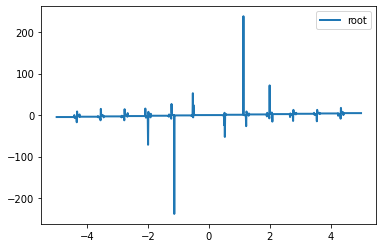

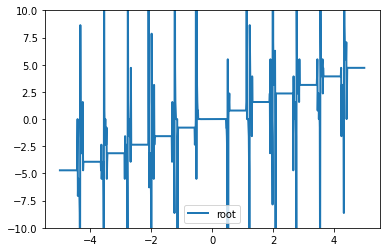

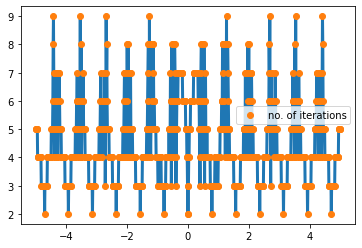

In [3]:
#plot dependence
# Import pyplot as plt
import matplotlib.pyplot as plt

#plot the root
#plt.plot(x_start, x_solv, lw=2)
plt.plot(x_start, x_solv, lw=2, label='root')

plt.legend()
plt.show()

plt.plot(x_start, x_solv, lw=2, label='root')
plt.ylim(-10, 10)

plt.legend()
plt.show()

# plot the number of iterations
plt.plot(x_start, n_step, lw=3)
plt.plot(x_start, n_step, 'o', label='no. of iterations')

plt.legend()
plt.show()

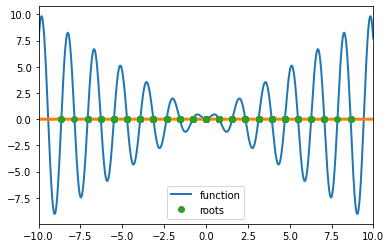

In [4]:
#plot function
# Import pyplot as plt
import matplotlib.pyplot as plt

t = np.arange(min(x1,x0)-5, max(x1,x0)+5, 0.01)

#plot the function
ssin = f(t)
zero = [0] * len(t)
zero1 = [0] * len(x_solv)
plt.plot(t, ssin, lw=2, label='function')
plt.plot(t, zero, lw=3)
plt.plot(x_solv, zero1, 'o', label='roots')
plt.xlim((min(x1,x0)-5, max(x1,x0)+5))

plt.legend()
plt.show()

 **CONCLUSIONS:**

The root found by a Newton method depends on the starting point. Iterates may diverge. The number of iterations depends on the starting point.

### **2)**

Set of equations : 

(x^2)+(y^2)+(z^2) = 2 <=> (x^2)+(y^2)+(z^2)-2= 0

(x^2)+(y^2) = 1 <=> (x^2)+(y^2)-1 = 0

x^2 = y <=> (x^2)-y= y



_______________________________________

Jacobian for this set : 
J(x,y,z)=

          (2x   2y   2z) 
          (2x   2y   0 )
          (2x   -y    0 )

### **3)**

In [8]:
import numpy as np


def function_matrix(xyz):
    x, y, z = xyz
    return [x**2 + y**2 + z**2 -2, 
            x**2 + y**2 - 1, 
            x**2-y]


def jacobian_matrix(xyz):
    x, y, z = xyz
    return [[2*x, 2*y, 2*z],
            [2*x, 2*y, 0],
            [2*x, -1, 0]]

    
# iterative Newton's method
def iterative_newton(fun, x_init, jacobian):
    max_iter = 50
    epsilon = 1e-8

    x_last = x_init

    for k in range(max_iter):
        # Solve J(xn)*( xn+1 - xn ) = -F(xn):
        J = np.array(jacobian(x_last))
        F = np.array(fun(x_last))

        # inverted Jacobian
        Jinv = np.linalg.inv(J)
        #  x(n+1) = x(n) − J^(−1)(x(n))*F(x(n)).
        #  np.dot - array/vector multiplication
        diff = np.dot(Jinv,F)
        x_last = x_last - diff
        
        print(x_last)        

        # Stop condition:
        if np.linalg.norm(diff) < epsilon:
            print('convergence!, nre iter:', k )
            break

    else: # only if the for loop end 'naturally'
        print('not converged')

    return x_last



x_sol = iterative_newton(function_matrix, [2.0,1.0,2.0], jacobian_matrix)
print('solution exercice:', x_sol )
print('F(sol)', function_matrix(x_sol) )
print(" ")

[1.16666667 0.66666667 1.25      ]
[0.84863946 0.61904762 1.025     ]
[0.78845225 0.61803445 1.00030488]
[0.78615473 0.61803399 1.00000005]
[0.78615138 0.61803399 1.        ]
[0.78615138 0.61803399 1.        ]
convergence!, nre iter: 5
solution exercice: [0.78615138 0.61803399 1.        ]
F(sol) [0.0, -1.1102230246251565e-16, 0.0]
 


### **4)**

In [10]:
import numpy as np

def function_matrix(xyz):
    x, y, z = xyz
    return [x**2 + y**2 + z**2 -2, 
            x**2 + y**2 - 1, 
            x**2-y]


def jacobian_matrix(xyz):
    x, y, z = xyz
    return [[2*x, 2*y, 2*z],
            [2*x, 2*y, 0],
            [2*x, -1, 0]]


# iterative Newton's method with Aitken's acceleration
def iterative_aitken(fun, x_init, jacobian):
    max_iter = 50
    epsilon = 1e-8

    # Aitken's acceleration from http://www.zen89632.zen.co.uk/R/EM_Aitken/em_aitken.pdf

    loop_break = 0
   
    l = len(x_init)
    X = np.zeros([max_iter+l+2,l])
    X[0] = x_init

    for n in range(0, max_iter, l):
      if loop_break:
        break
      for k in range (0,l):
        # Solve J(xn)*( xn+1 - xn ) = -F(xn):
        J = np.array(jacobian(X[n+k]))
        F = np.array(fun(X[n+k]))

        # inverted Jacobian
        Jinv = np.linalg.inv(J)
        #  x(n+1) = x(n) − J^(−1)(x(n))*F(x(n)).
        #  np.dot - array/vector multiplication
        diff = np.dot(Jinv,F)
        X[n+k+1] = X[n+k] - diff
    
        print(X[n+k+1])   
        
      X1=np.zeros([l,l])
      X2=np.zeros([l,l])
      X3=np.zeros([l,l])

      for i in range(l):
          for j in range(l):
            X1[j,i] = X[n+k-1-i,j] 
            X2[j,i] = X[n+k-i,j] 
            X3[j,i] = X[n+k+1-i,j] 
        
      #print("X1 ",X1)
      #print("X2 ",X2)
      #print("X3 ",X3)
      #print("X2-X1 ",np.subtract(X2,X1)," det = ", np.linalg.det(np.subtract(X2,X1)))
      if abs( np.linalg.det(np.subtract(X2,X1)) ) > 1e-16:
           Lambda = np.dot(np.subtract(X3,X2),np.linalg.inv(np.subtract(X2,X1)))
           #print("Lambda = ",Lambda)
           XX1 = np.linalg.inv(np.subtract(np.identity(l),Lambda))
           XX2 = np.subtract(X[n+1],np.dot(Lambda,X[n]))
           XX  = np.dot(XX1, XX2)
           #print(" XX0 = ",np.subtract(np.identity(l),Lambda),np.identity(l),Lambda)
           #print(" XX1 = ",XX1)
           #print(" XX2 = ",XX2)
           print(" Without acceleration = ",X[n+k+1])
           print(" Aitken's accelerated = ",XX)
           X[n+k+1] = XX

          


      # Stop condition:
      if np.linalg.norm(diff) < epsilon:
            print('convergence!, nre iter:', n )
            X_out = X[n+k+1]
            loop_break = 1
            break

    else: # only if the for loop end 'naturally'
        print('not converged')
        X_out = X[n+k+1]

    return X_out


x_sol = iterative_aitken(function_matrix, [2.0,1.0,2.0], jacobian_matrix)
print('solution slow:', x_sol )
print('F(sol)', function_matrix(x_sol) )
print(" ")

[1.16666667 0.66666667 1.25      ]
[0.84863946 0.61904762 1.025     ]
[0.78845225 0.61803445 1.00030488]
 Without acceleration =  [0.78845225 0.61803445 1.00030488]
 Aitken's accelerated =  [-1.34385078  0.12954168 -0.60815517]
[-0.97238902  0.80755657 -1.12623618]
[-0.81104859  0.63176908 -1.0070747 ]
[-0.7865849   0.61811733 -1.00002485]
 Without acceleration =  [-0.7865849   0.61811733 -1.00002485]
 Aitken's accelerated =  [-0.77941498  0.61338632 -0.99723663]
[-0.78618671  0.61804369 -1.00000383]
[-0.78615138  0.61803399 -1.        ]
[-0.78615138  0.61803399 -1.        ]
 Without acceleration =  [-0.78615138  0.61803399 -1.        ]
 Aitken's accelerated =  [-0.78615138  0.61803399 -1.        ]
convergence!, nre iter: 6
solution slow: [-0.78615138  0.61803399 -1.        ]
F(sol) [-1.7535068952412303e-09, -1.3078047533809922e-09, -4.712623624669732e-10]
 
